In [141]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

### global configuration

In [142]:
NN = 14 # node num
G_type = 'ws' # type of graph: ws / ba
SN = 100 # resample num
T = 20 # step in each sample

### func : generate the network structure

In [143]:
def generate_network(NN):
    if G_type == 'ba':
        BA = nx.random_graphs.barabasi_albert_graph(NN, 2)
        return BA
    elif G_type == 'ws':
        WS = nx.random_graphs.watts_strogatz_graph(NN, 4, 0.3)
    return WS

### func : spread

In [144]:
# get the innode of each node 
# return:{0:[1,2,3],1:[0,4]...}
def get_innodes(adj):
    innodes = {}
    for i in range(adj.shape[0]):
        innode = []
        for j in range(adj.shape[0]):
            if adj[j][i] == 1:
                innode.append(j)
        innodes[i] = innode
    return innodes

In [145]:
# let the opinion spread
# step: time step in each initialization
def spread(dg, step = 100):
    node_num = dg.number_of_nodes()
    # data to be returned 
    data = []
    # add initial value to data
    origin_val = []
    for i in range(node_num):
        origin_val.append(dg.nodes[i]['value'])
    data.append(origin_val)

    # control the circulates
    run=0
    # step is the only limitation because there is no conception like attractor and so on...
    while run < step:
        run += 1
        # each step
        next_val = []
        for i in range(node_num):
            # num for neighbors who vote for agree
            k = 0.
            # num for all neighbors
            m = len(innodes[i])
            for idx,val in enumerate(innodes[i]):
                if dg.nodes[val]['value'] == 1:
                    k += 1.
            if random.random() < k / m:
                next_val.append(1)
            else:
                next_val.append(0)

        # set value to the net
        for i in range(node_num):
            dg.nodes[i]['value'] = next_val[i]

        # add to data to record
        data.append(next_val)
    return np.array(data)

### func : initialization

In [146]:
# init node data randomly
def init_node(dg):
    for i in range(dg.number_of_nodes()):
        dg.nodes[i]['value'] = random.randint(0,1)
    return dg

# ______ run ______

### initialize

In [147]:
dg = generate_network(NN)
adj = nx.adjacency_matrix(dg).toarray()
innodes = get_innodes(adj)

### visulaziation of net structure

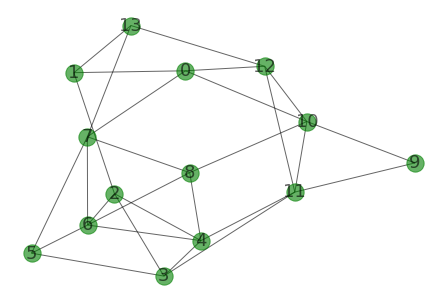

In [148]:
node_labels = dg.nodes()
ld = {}#label dict
for no in dg.nodes():
    ld[no] = ''+str(no)
nx.draw(dg,pos=nx.spring_layout(dg),labels=ld, with_labels = True,font_size=18,node_color='green',alpha=0.6)

### spread

In [149]:
# data in all sample
data = []
for sam in range(SN):
    # data in one sample
    data_sample = []
    # random init
    dg = init_node(dg)
    # spread
    data_sample = spread(dg,step=T)
    data.append(data_sample)

In [150]:
#[sample, step, node]
data = np.array(data) 

In [151]:
data.shape

(100, 21, 14)

### visulaziation of opinions

In [152]:
xs = []
for i in range(data.shape[1]):
    xs.append(i)
    xs.append(i+1)

In [153]:
def ys_change(ys):
    ys = ys.tolist()
    ys_ = []
    for item in ys:
        ys_.append(item)
        ys_.append(item)
    return ys_

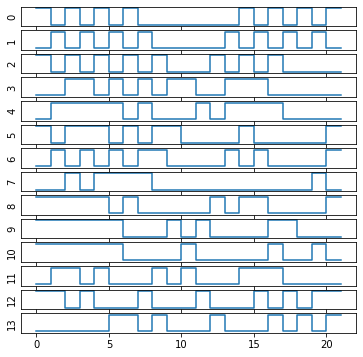

In [154]:
sam = 1
view_n = 14

plt.figure(figsize=(6,6))
for i in range(view_n):
    ys_ = ys_change(data[sam,:,i])
    plt.subplot(view_n,1,i+1)
    plt.plot(xs,ys_)
    plt.ylim(-0.1,1.1)
    plt.yticks(())
    plt.ylabel(str(i))
plt.show()

### save the model

In [155]:
import pickle
with open('./voter_s'+str(SN)+'_n'+str(NN)+'_t'+str(T)+'.pkl','wb') as f:
    pickle.dump(data,f)